# Example

    아래의 그림에서는 그림과 같이 6개의 점이 있다.

    파란색 선으로 연결된 점끼리는 서로 같은 집합 내에 있다.

    그럼 집합이 총 몇 개가 나올까?

    당연히 3개로 구성될 것이다.



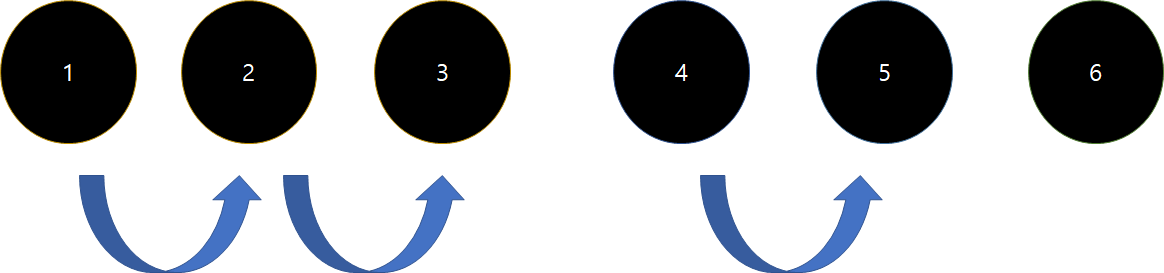

> 이를 어떻게 구현할까?

    같은 집합 내에 있는 노드 중 가장 index가 큰 원소를 최상위 부모 노드라고 하자

    그럼 최상위 부모 노드는 3, 5, 6이다.

    즉, 같은 최상위 부모 노드를 가지는 노드끼리 같은 집합으로 묶으면 된다. 

In [7]:
N = 6    # 노드의 수
graph = [(1, 2), (2, 3), (4, 5)]    # 연결 요소
parent_tab = list(range(N+1))    # 부모 테이블  (i번째 원소의 부모는 i로 초기화)

In [8]:
def find_parent(parent, i):    # i번째 원소의 부모를 찾는 함수  # 재귀적으로 함수를 구성
    if parent[i]!=i:
        return find_parent(parent, parent[i])
    else:
        return i

In [9]:
def union_parent(parent, i,j):
    i, j = find_parent(parent, i), find_parent(parent, j)
    i, j = max(i, j), min(i, j)
    parent[j] = i    

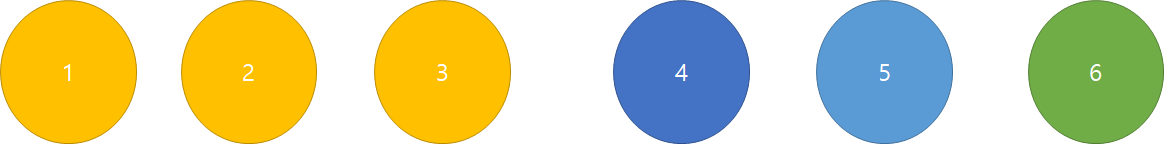

In [10]:
for g in graph:
    i, j = g
    union_parent(parent_tab, i, j)

for i in range(1, N+1):    
    print(f'{i}th node ---> Parent {find_parent(parent_tab, i)}th node')

1th node ---> Parent 3th node
2th node ---> Parent 3th node
3th node ---> Parent 3th node
4th node ---> Parent 5th node
5th node ---> Parent 5th node
6th node ---> Parent 6th node


### 경로 압축 기법

노드의 개수를 $V$ , graph list 내부의 원소가 $M$ 개 (union 연산의 횟수) 라고 해보자

그럼 시간 복잡도는 최대 $O(VM)$ 으로 비효율적이다.

이러한 문제를 경로 압축기법으로 해결할 수 있다.

(경로 압축기법 사용시 시간 복잡도는 $O(V+M(1+log_{2-M/V}V))$ 라고 한다.)

경로 압축기법을 사용하여 find_parent 함수를 수정하자

In [ ]:
def find_parent(parent, i):
    if parent[i]!=i:
        parent[i] = find_parent(parent, parent[i])   # 재귀호출 할 때 테이블 값 갱신하는 코드 추가
    return parent[i]

# Cylcle 판별


    서로소 알고리즘을 통해서 그래프의 사이클이 있는지 아닌지를 판단 가능하다
    아래는 pesudo 코드이다.
    ( find_parent, union_parent는 위에서 정의한 함수를 사용하면 된다 )

    
    for 간선 in 그래프:
    시작점, 끝점 = 간선    
    if find_parent(시작점) != find_parent(끝점):    
        union_parent(시작점, 끝점)
    else:    
        print('Cylcle 발생')         

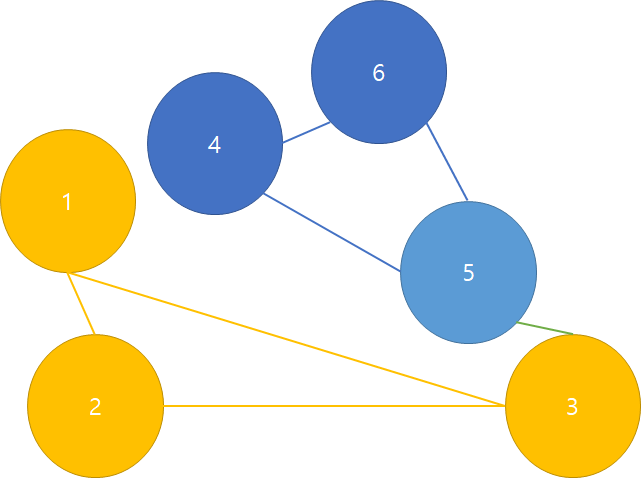

In [17]:
cycle_cnt = 0
N = 6
graph = [(1, 2), (1, 3), (2, 3),(3, 5), (4, 5), (4, 6), (5, 6)]   
parent_tab = list(range(N+1))    

for g in graph:
    i, j = g
    if find_parent(parent_tab, i) != find_parent(parent_tab, j):
        union_parent(parent_tab, i, j)
    else:
        cycle_cnt += 1
        continue

print(f'Cycle appears {cycle_cnt}-times')

Cycle appears 2-times
